# Introduction to neural networks

CREDIT: This practical was inspired by [this Kaggle notebook on neural networks](https://www.kaggle.com/code/prashant111/mnist-deep-neural-network-with-keras).

## Setup
### Imports

In [2]:
import pandas as pd                                     # for dataset manipulation (DataFrames)
import numpy as np                                      # allows some mathematical operations
import matplotlib.pyplot as plt                         # library used to display graphs
import seaborn as sns                                   # more convenient visualisation library for dataframes
import time                                             # for execution time measurement

### Neural-networks-related imports

There are two main libraries to work with neural networks in Python: `pytorch` (developed by Meta/Facebook) and `tensorflow` (developed by Google).
In this practical, we will work with `tensorflow`, and more specifically with a library that makes it easier to use: `keras`.
The relevant imports are listed below.

In [3]:
# Neural network libraries
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam, RMSprop
from keras import  backend as K

## Importing and observing the data

For this introduction to neural networks, we will be working with the well-known MNIST handwritten digits dataset.
This dataset can be imported directly from `keras`. You'll note that, unlike `scikit-learn`, `keras` already separates the data into a training and test set.

Once you have imported the data, answer the following questions:
1. What are the shapes of `x_train`, `y_train`, `x_test`, `y_test`? What does it mean?
2. What is the proportion of test data?
3. How many classes are there? What are they? Are they balanced?

In [40]:
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_test.shape

(10000, 28, 28)

In [12]:
y_train.shape

(60000,)

In [13]:
y_test.shape

(10000,)

In [23]:
# Question 2 : Proportion de données de test
proportion_test_data = (len(x_test) / (len(x_train) + len(x_test)))*100
print(f"Proportion de données de test de {proportion_test_data}%")

Proportion de données de test de 14.285714285714285%


*[Your comments here]*

The code below will let you visualize random samples from the training dataset.

**[Bonus]** Add comments to the code to explain how it works.

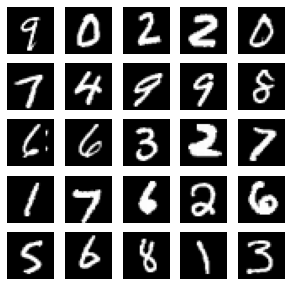

In [41]:
# ...
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# ...
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()

## Preparing the data

1. Determine the minimum and maximum value for pixels in the image.
2. Scale `x_train` and `x_test` to make sure their values remain between 0 and 1. This prevents gradients from becoming too large during backpropagation.
3. Reshape the matrices so that every input is 1D. For example, `x_train`'s shape should be `(number of samples, size of an image)`.

We want the network to output a probability for each class. Therefore, the current representation of labels is not suitable. We need to convert the current labels into binary vectors of size 10. This is called [one-hot encoding](https://en.wikipedia.org/wiki/One-hot)

4. Using the `to_categorical` function, perform one-hot encoding for `y_train` and `y_test`.

Your data is not ready to be used in a neural network!
 

In [42]:

# Déterminez la valeur minimale et maximale des pixels dans les images
from keras.utils import to_categorical
min_pixel_value = x_train.min()
max_pixel_value = x_train.max()

# Mettez à l'échelle x_train et x_test entre 0 et 1
x_train = x_train/255
x_test = x_test/255

# Remodelez les matrices pour chaque entrée soit 1D
x_train = x_train.reshape(x_train.shape[0], -1)  # Laissez le nombre d'échantillons, mais aplatissez les images
x_test = x_test.reshape(x_test.shape[0], -1)

# Effectuez l'encodage one-hot pour y_train et y_test
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

*[Your comments here]*

## Building the network

In this section, we will build a neural network using `keras`.

In the following cell, we define some parameters that will be used in the network.

In [44]:
batch_size = 128 # indicates the number of data that we will use for each update of the model parameters
hidden_units = 256 # number of units in the hidden layers
dropout = 0.45 # dropout rate

We will build the network in the following cell. Using the examples provided, complete the network architecture.

In [45]:
model = Sequential() # initialize the network as a sequence of layers
model.add(Dense(hidden_units, input_dim=28*28)) # input_dim corresponds to the input size, i.e. the number of pixels
model.add(Activation('relu')) # defines the activation function
model.add(Dropout(dropout)) # dropout layers randomly sets input units to 0 to prevent overfitting
# add another dense layer here with the same number of units (the input_dim parameter is not required this time)
# add another relu activation function
# add another dropout layer with the same dropout rate
# add the output layer (dense layer with as many units as there are possible outputs)
# add a softmax activation (the softmax function returns a value between 0 and 1, which is interpreted as a probability)

In [46]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 activation_8 (Activation)   (None, 256)               0         
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
Total params: 200,960
Trainable params: 200,960
Non-trainable params: 0
_________________________________________________________________


Using the `summary` function, find out how many parameters the model has. What comments can you make?

**[Bonus]** Justify the amount of parameters.

## Training the network

In order to be used, a model needs to be compiled. In the cell below, explain what each of the parameters are (either as code comments or markdown text).

In [47]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=28*28))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(10))
model.add(Activation('softmax'))

In [48]:
model.compile(loss='categorical_crossentropy', # ...
              optimizer='adam', # ...
              metrics=['accuracy']) # ...

The model can then be fit to our data and its performance can be measured. Interpret the results you obtained.

In [49]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.4219 - accuracy: 0.8690
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1941 - accuracy: 0.9416
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1524 - accuracy: 0.9547
Epoch 4/20
469/469 [==============================] - 3s 5ms/step - loss: 0.1265 - accuracy: 0.9618
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1125 - accuracy: 0.9660
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1041 - accuracy: 0.9677
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0950 - accuracy: 0.9703
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0894 - accuracy: 0.9732
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0800 - accuracy: 0.9747
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0765 - accuracy: 0.9756

In [50]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.9824

Test accuracy: 98.2%


Congratulations! You have successfully built and trained a simple neural network!

## Bonus questions

Try changing the parameters and architecture of the model, and comment on any changes you observe.

*[Your comments here]*

In [ ]:
# Your code here